In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
input_size = 784 # 28x28
hidden_size_1 = 500 
hidden_size_2 =250
hidden_size_3 = 100
num_classes = 10
num_epochs = 15
batch_size = 64
learning_rate = 0.01

In [4]:
# Import MNIST dataset 
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [5]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


In [6]:
# Fully connected neural network
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1,hidden_size_2,hidden_size_3, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size_1) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size_1, hidden_size_2)

        self.l3 = nn.Linear(hidden_size_2, hidden_size_3)
        
        self.l4 = nn.Linear(hidden_size_3, num_classes)
        self.softmax = nn.LogSoftmax(dim = 1) 
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        out = self.relu(out)
        out = self.l4(out)
        out = self.softmax(out)
        
        return out


model = NeuralNet(input_size, hidden_size_1,hidden_size_2,hidden_size_3, num_classes).to(device)

In [7]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001, betas=(0.9, 0.999), eps=1e-08 )

In [8]:
# Train the model
loss_log = []
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):  
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()


        if (i+1) % 200 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
            loss_log.append(loss.item())

Epoch [1/15], Step [200/938], Loss: 0.3171
Epoch [1/15], Step [400/938], Loss: 0.2477
Epoch [1/15], Step [600/938], Loss: 0.2779
Epoch [1/15], Step [800/938], Loss: 0.1313
Epoch [2/15], Step [200/938], Loss: 0.1276
Epoch [2/15], Step [400/938], Loss: 0.2834
Epoch [2/15], Step [600/938], Loss: 0.0065
Epoch [2/15], Step [800/938], Loss: 0.0667
Epoch [3/15], Step [200/938], Loss: 0.0767
Epoch [3/15], Step [400/938], Loss: 0.0205
Epoch [3/15], Step [600/938], Loss: 0.0729
Epoch [3/15], Step [800/938], Loss: 0.0324
Epoch [4/15], Step [200/938], Loss: 0.0195
Epoch [4/15], Step [400/938], Loss: 0.0080
Epoch [4/15], Step [600/938], Loss: 0.0095
Epoch [4/15], Step [800/938], Loss: 0.1032
Epoch [5/15], Step [200/938], Loss: 0.0342
Epoch [5/15], Step [400/938], Loss: 0.0119
Epoch [5/15], Step [600/938], Loss: 0.1015
Epoch [5/15], Step [800/938], Loss: 0.0078
Epoch [6/15], Step [200/938], Loss: 0.0403
Epoch [6/15], Step [400/938], Loss: 0.0013
Epoch [6/15], Step [600/938], Loss: 0.0239
Epoch [6/15

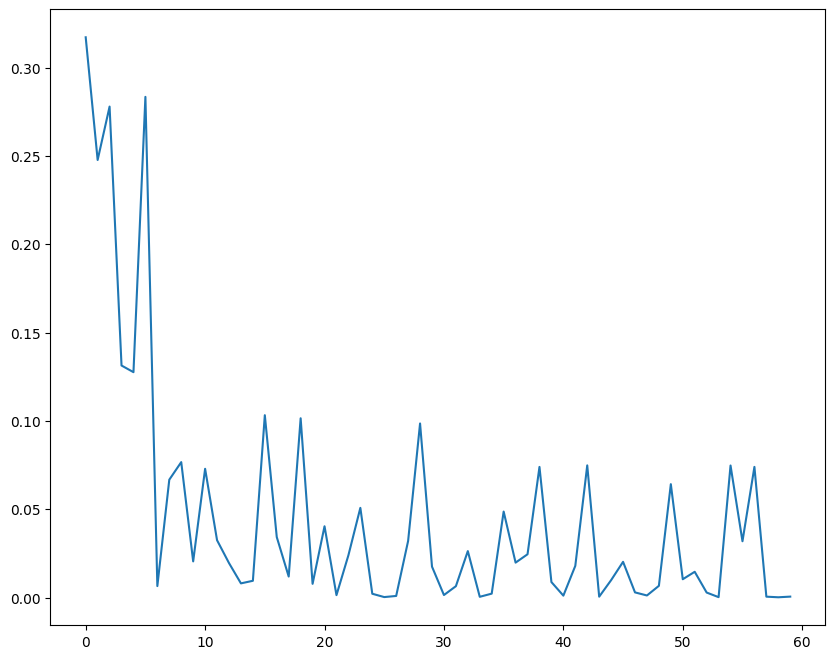

In [11]:
plt.figure(figsize=(10,8))
plt.plot(loss_log)

In [ ]:
# Test the model
# In test phase, we don't need to compute gradients (for memory efficiency)
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value ,index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the network on the 10000 test images: {acc} %')

*Inference: This model using ADAM optimiser instead of gradient descent outperforms all unregularised and the regularised relu activation model. This shows that ADAM optimiser is better than Gradient descent for learning parameters.*